# Unsupervised Learning on Country Data

**Clustering the Countries by using Unsupervised Learning for HELP International
Objective:**
To categorize the countries using socio-economic and health factors that determine the overall development of the country.

**About organization:**
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement:**
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Data Information

| Column Name    | Description                                                                                                 |
|----------------|-------------------------------------------------------------------------------------------------------------|
| **country**    | Name of the country.                                                                                         |
| **child_mort** | Death of children under 5 years of age per 1000 live births. (Metric: Mortality rate per 1000 live births)   |
| **exports**    | Exports of goods and services per capita. Given as %age of the GDP per capita. (Metric: Percentage of GDP per capita attributed to exports) |
| **health**     | Total health spending per capita. Given as %age of GDP per capita. (Metric: Percentage of GDP per capita spent on healthcare) |
| **imports**    | Imports of goods and services per capita. Given as %age of the GDP per capita. (Metric: Percentage of GDP per capita attributed to imports) |
| **income**     | Net income per person. (Metric: Income per capita, Net)                                                      |
| **inflation**  | The measurement of the annual growth rate of the Total GDP. (Metric: Annual growth rate of the country's GDP) |
| **life_expec** | The average number of years a new born child would live if the current mortality patterns remain the same. (Metric: Life expectancy at birth) |
| **total_fer**  | The number of children that would be born to each woman if the current age-fertility rates remain the same. (Metric: Total fertility rate, children per woman) |
| **gdpp**       | The GDP per capita. Calculated as the Total GDP divided by the total population. (Metric: Gross Domestic Product per capita) |






### I. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



### II. Import Data

In [2]:
df = pd.read_csv('../data/raw/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
dd = pd.read_csv('../data/data-dictionary.csv')
dd.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [4]:
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset shape: 167 rows, 10 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### III. Exploratory Data Analysis

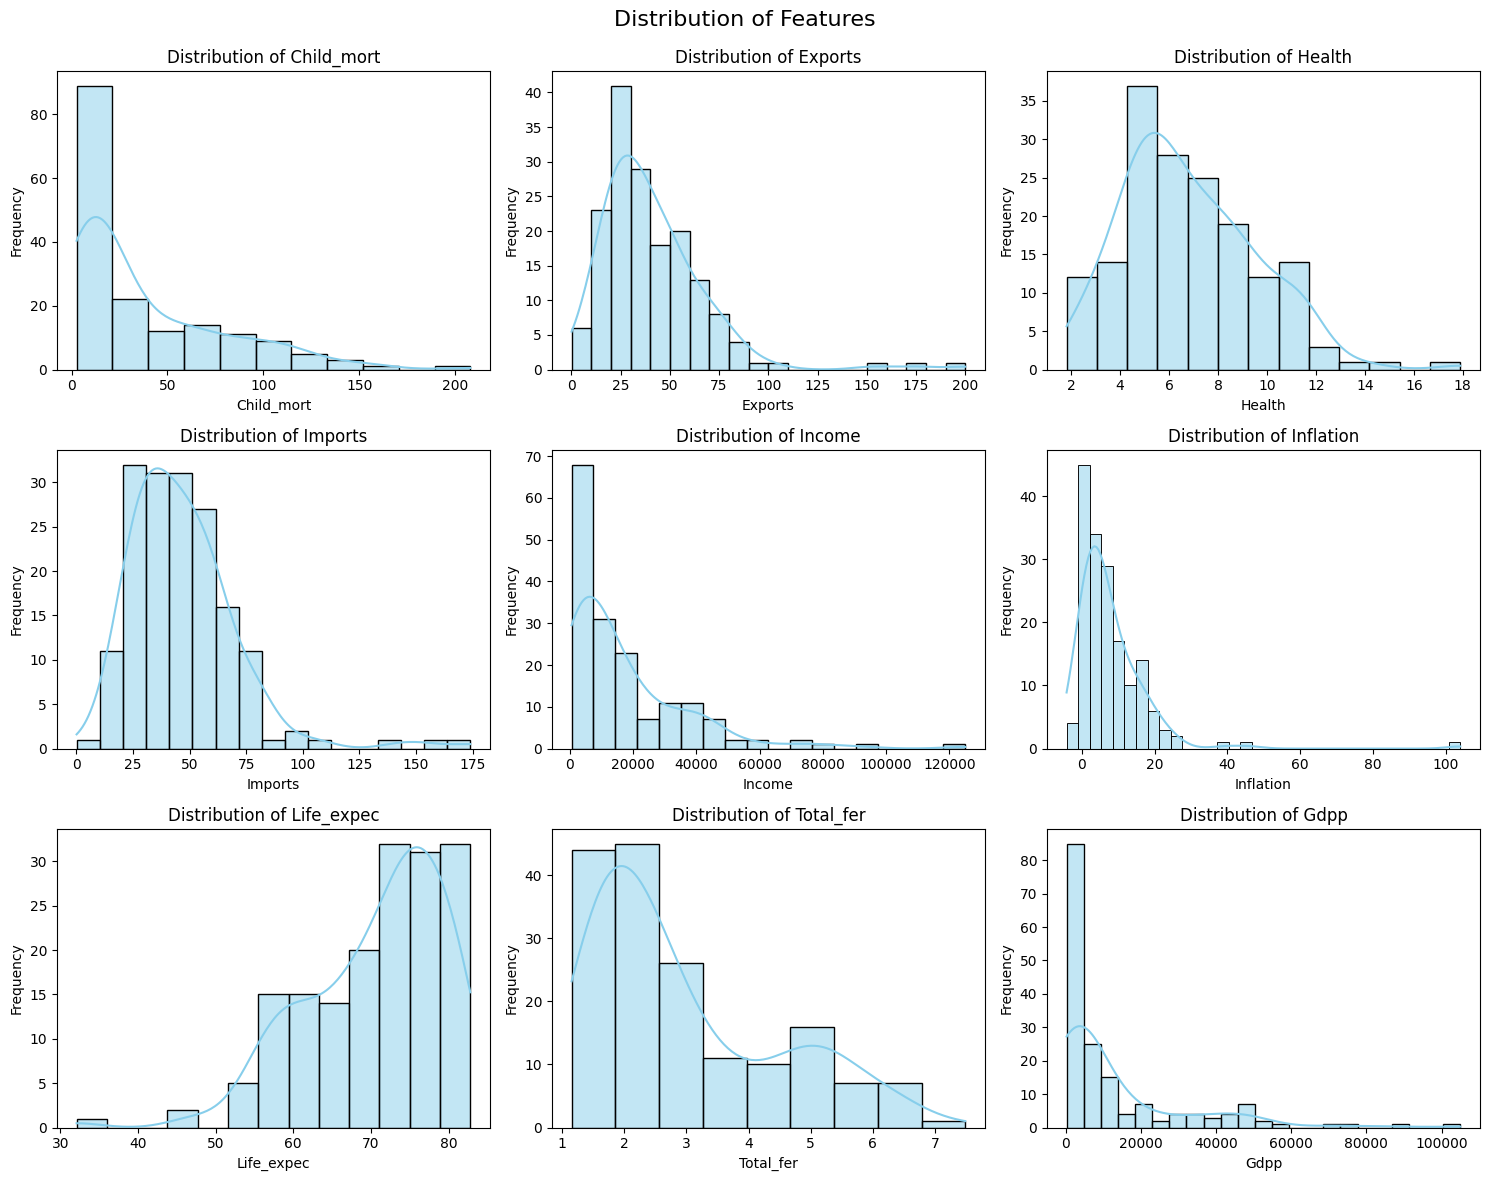

In [7]:
# Plotting the distribution of each feature
import math

features = df.columns[1:]
n_features = len(features)

# Dynamically calculate grid size
rows = math.ceil(n_features / 3)  # 3 columns per row
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature's distribution
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col.capitalize()}', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Distribution of Features', fontsize=16)
plt.show()


#### IV. Data Processing

In [8]:
df.shape

(167, 10)

In [9]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [20]:
# Extract numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_columns]

# Check for missing values
X = X.dropna()

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

#### V. Model Training

##### KMeans Model

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    return silhouette, calinski, davies_bouldin

# Test KMeans for both scalers
for scaler_name, X_scaled in [("StandardScaler", X_standard_scaled)]:
    print(f"\nTesting KMeans with {scaler_name}:")
    for n_clusters in range(2, 11):  # Try clusters from 2 to 10
        silhouette, calinski, davies_bouldin = evaluate_kmeans(X_scaled, n_clusters)
        print(f"Clusters: {n_clusters} | Silhouette: {silhouette:.4f} | Calinski: {calinski:.4f} | Davies-Bouldin: {davies_bouldin:.4f}")



Testing KMeans with StandardScaler:
Clusters: 2 | Silhouette: 0.2663 | Calinski: 68.1914 | Davies-Bouldin: 1.3686
Clusters: 3 | Silhouette: 0.2856 | Calinski: 66.2150 | Davies-Bouldin: 1.2742
Clusters: 4 | Silhouette: 0.2880 | Calinski: 54.3779 | Davies-Bouldin: 0.9983
Clusters: 5 | Silhouette: 0.3009 | Calinski: 57.6225 | Davies-Bouldin: 0.8671
Clusters: 6 | Silhouette: 0.2357 | Calinski: 53.6765 | Davies-Bouldin: 1.0770
Clusters: 7 | Silhouette: 0.2479 | Calinski: 54.0959 | Davies-Bouldin: 1.0088
Clusters: 8 | Silhouette: 0.2020 | Calinski: 46.8446 | Davies-Bouldin: 1.2155
Clusters: 9 | Silhouette: 0.1923 | Calinski: 45.4877 | Davies-Bouldin: 1.1958
Clusters: 10 | Silhouette: 0.1962 | Calinski: 43.0323 | Davies-Bouldin: 1.1683


##### DBScan

In [29]:
from sklearn.cluster import DBSCAN

def evaluate_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    # Exclude noise points (labeled as -1) from evaluation
    if len(set(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        calinski = calinski_harabasz_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        return silhouette, calinski, davies_bouldin
    else:
        return None, None, None

# Test DBSCAN for both scalers
for scaler_name, X_scaled in [("StandardScaler", X_standard_scaled)]:
    print(f"\nTesting DBSCAN with {scaler_name}:")
    for eps in [0.5, 1.0, 1.5]:  # Try different eps values
        for min_samples in [5, 10]:  # Try different min_samples values
            silhouette, calinski, davies_bouldin = evaluate_dbscan(X_scaled, eps, min_samples)
            if silhouette:
                print(f"eps: {eps}, min_samples: {min_samples} | Silhouette: {silhouette:.4f} | Calinski: {calinski:.4f} | Davies-Bouldin: {davies_bouldin:.4f}")



Testing DBSCAN with StandardScaler:
eps: 1.0, min_samples: 5 | Silhouette: -0.0248 | Calinski: 13.0840 | Davies-Bouldin: 1.9090
eps: 1.0, min_samples: 10 | Silhouette: -0.1458 | Calinski: 3.4907 | Davies-Bouldin: 2.3297
eps: 1.5, min_samples: 5 | Silhouette: 0.2883 | Calinski: 8.4918 | Davies-Bouldin: 3.7808
eps: 1.5, min_samples: 10 | Silhouette: 0.2532 | Calinski: 9.5396 | Davies-Bouldin: 3.7056


#### VI. Hyperparameter Tuning

##### KMeans Hyperparameter Tuning
Elbow method using WCSS

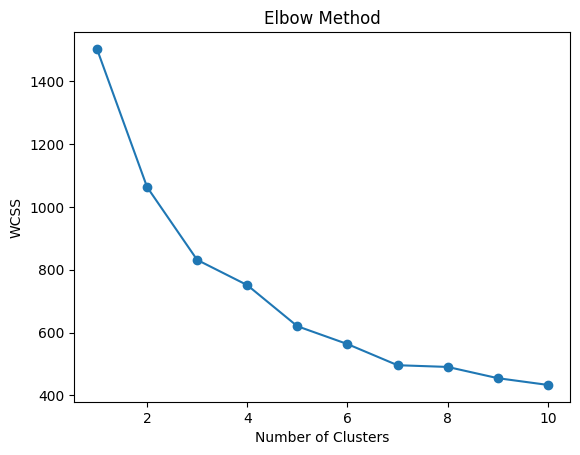

In [25]:
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (WCSS) for different numbers of clusters
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_standard_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


##### DBScan Hyperparameter Tuning
K-distance graph find optimal eps

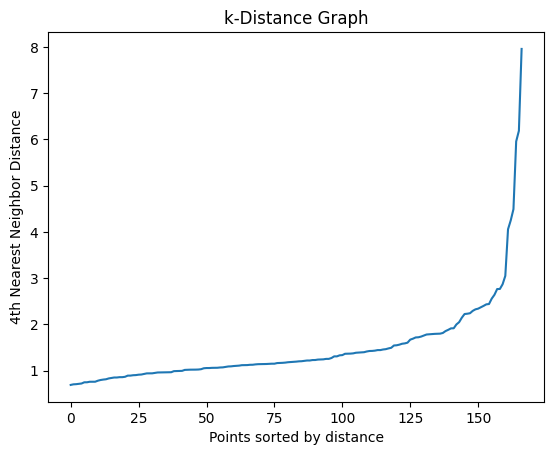

In [26]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit Nearest Neighbors model
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_standard_scaled)
distances, indices = nbrs.kneighbors(X_standard_scaled)

# Sort distances for the k-distance plot
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.show()


#### VII. Model Evaluation

In [16]:
# # Analyze countries in the most vulnerable cluster (e.g., Cluster 0 in KMeans)
# vulnerable_countries = df[df['KMeans_Cluster'] == 0]['country']
# print("Countries in dire need of aid:")
# print(vulnerable_countries)
